<font size=5>**K-Nearest Neighbors(KNN)**</font>

The k-nearest neighbors algorithm is a supervised classification algorithm. It takes a bunch of labeled points and uses them to learn how to label other points. To label a new point, it looks at the labeled points closest to that new point which are its nearest neighbors, and has those neighbors vote. So whichever label, the most of the neighbors have is the label for the new point. Here “k” in K-Nearest Neighbors is the number of neighbors it checks. It is supervised because you are trying to classify a point based on the known classification of other points.

**Import Libraries**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [5]:
df = pd.read_csv('C:\\Users\POOJA\Downloads\python\Projects\KNN\\advertising.csv')

In [6]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [7]:
df.shape

(1000, 10)

In [8]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [9]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


**Exploratory Data Analysis**

**Create histogram of attribute Age**

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


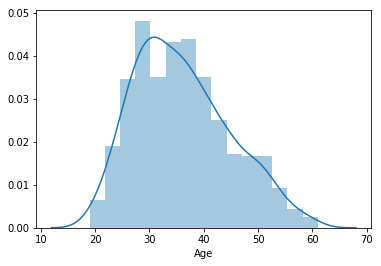

In [11]:
sns.distplot(df['Age'],bins=15)

**Create jointploat of attributes Area Income and Daily Internet Usage**

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


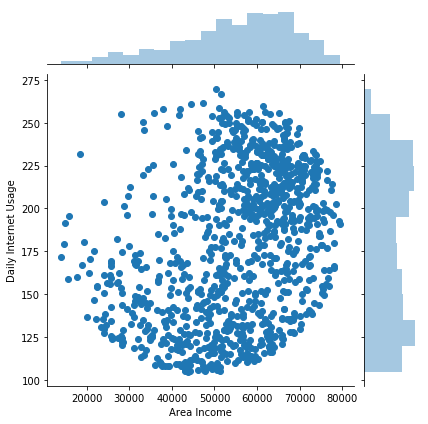

In [14]:
sns.jointplot(df['Area Income'],df['Daily Internet Usage'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


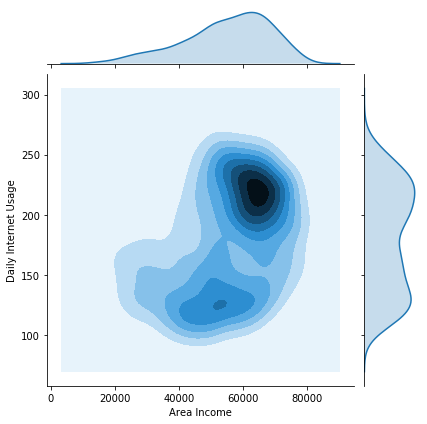

In [15]:
sns.jointplot(df['Area Income'],df['Daily Internet Usage'],kind='kde')

**Model Training**

In [18]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [23]:
zero_na =['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage']
for column in zero_na:
    df[column]=df[column].replace(0,np.NaN)
    mean= int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.NaN,mean)

In [52]:
x= df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male',]].values
y= df.iloc[:,-1]

In [59]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train)

[[7.327000e+01 2.800000e+01 6.730139e+04 2.162400e+02 1.000000e+00]
 [5.156000e+01 4.600000e+01 6.310219e+04 1.248500e+02 0.000000e+00]
 [5.630000e+01 4.900000e+01 6.743096e+04 1.352400e+02 1.000000e+00]
 ...
 [7.394000e+01 2.600000e+01 5.541106e+04 2.361500e+02 1.000000e+00]
 [7.864000e+01 3.100000e+01 6.028347e+04 2.352800e+02 1.000000e+00]
 [4.206000e+01 3.400000e+01 4.324119e+04 1.315500e+02 0.000000e+00]]


In [81]:
#feature Scaling,knn assum normality so we have to do scling inti -1 to 1
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).

Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

In [62]:
x_train

array([[ 0.53448142, -0.92842669,  0.91865168,  0.84125985,  1.06458129],
       [-0.82619679,  1.11581557,  0.60803575, -1.2505932 , -0.93933644],
       [-0.52911642,  1.45652261,  0.928236  , -1.01277338,  1.06458129],
       ...,
       [ 0.57647379, -1.15556472,  0.03912084,  1.2969858 ,  1.06458129],
       [ 0.87104715, -0.58771965,  0.39953429,  1.27707211,  1.06458129],
       [-1.42161102, -0.24701261, -0.86108765, -1.09723489, -0.93933644]])

In [63]:
print(len(y))

1000


In [64]:
import math
math.sqrt(len(y))

31.622776601683793

square root of y is 31 so we should take k as 31 neighbors

In [65]:
knn= KNeighborsClassifier(n_neighbors=31,p=2)


pinteger, optional (default = 2)
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

metricstring or callable, default ‘minkowski’
the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. `

In [66]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=2,
           weights='uniform')

In [67]:
# Lets predict who clicked on ad using predict()
y_pred = knn.predict(x_test)

In [69]:
# Lets predict a person is likely to clicked on ad or not for new sample
knn.predict([[68.37,35,73889.99,225.58,0]])

array([0], dtype=int64)

We got y_pred as 0 means a new person is not going to click on the ad

In [80]:
knn.predict([[40.18,29,50760.23,151.96,0]])

array([0], dtype=int64)

**Evaluation metrics for KNN**

In [82]:
cnf = metrics.confusion_matrix(y_test,y_pred)
cnf

array([[108,   0],
       [  5,  87]], dtype=int64)

Text(0.5,1,'Confusion Matrix')

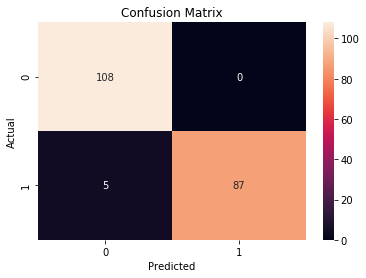

In [88]:
fig,ax=plt.subplots()
sns.heatmap(cnf,annot=True,fmt='g')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

In [89]:
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98       108
          1       1.00      0.95      0.97        92

avg / total       0.98      0.97      0.97       200



In [91]:
print('Accuracy score is:',metrics.accuracy_score(y_test,y_pred))

Accuracy score is: 0.975


Accuracy score is: 0.975 means our model is successful

In [93]:
y_proba= knn.predict_proba(x_test)[:,1]

In [94]:
#Predict probability for new sample
knn.predict_proba([[40.18,29,50760.23,151.96,0]])

array([[0.70967742, 0.29032258]])

Here probability of new person likely to click on ad is 29% 

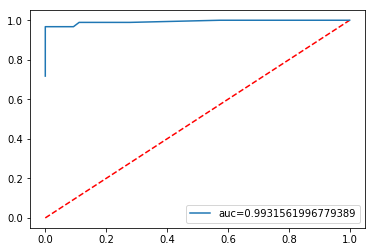

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
fpr,tpr,_= metrics.roc_curve(y_test,y_proba)
auc=metrics.roc_auc_score(y_test,y_proba)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)

The AUC score is 0.99 as the area under the ROC curve is large,model is doing quite a good job of distinguishing the positive and the negative values.This means that the model is performing very good and it is predictions are correct.